In [1]:
import os
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from imblearn.over_sampling import SMOTE
from dotenv import load_dotenv

load_dotenv()
current_year = int(os.getenv('current_year'))

In [11]:
teams_df = pd.read_csv("processed_teams.csv")
games_df = pd.read_csv("processed_games.csv")
#scaled_points_df = pd.read_csv("scaled_points.csv")
fields_to_use = ['wins', 'losses', 'scaled_pointsFor', 'scaled_pointsAgainst', 'scaled_lucky_win', 'scaled_unlucky_loss', 'playoffSeed', 'scaled_moves']

In [12]:
teams_df = teams_df[['year', 'abbrev', 'id', 'record.overall.wins', 'record.overall.losses', 'record.overall.pointsFor', 'record.overall.pointsAgainst', 'scaled_pointsFor', 'scaled_pointsAgainst', 'itm', 'playoffSeed', 'scaled_moves' ]]
teams_df.rename(columns={'record.overall.wins': 'wins', 'record.overall.losses': 'losses', 'record.overall.pointsFor': 'pointsFor', 'record.overall.pointsAgainst': 'pointsAgainst'}, inplace=True)
teams_df.head()

,year,abbrev,id,wins,losses,pointsFor,pointsAgainst,scaled_pointsFor,scaled_pointsAgainst,itm,playoffSeed,scaled_moves
0,2012,SEX,1,9,4,1415.0,1270.0,0.564041,-0.776622,0.0,5,1.228248
1,2013,KAP!,1,9,4,1485.7,1382.0,0.187645,-1.375147,0.0,1,2.592722
2,2014,MK,1,5,8,1497.7,1590.7,0.070461,1.251402,0.0,9,1.647454
3,2015,JVB!,1,7,6,1490.8,1423.5,0.357305,-0.382989,0.0,4,1.980877
4,2016,BBC,1,9,4,1512.2,1266.7,0.510800,-1.944866,0.0,1,1.472703


In [15]:
sum_luck = games_df.groupby(['year', 'id'])['unlucky_loss', 'lucky_win'].sum()
with_luck = teams_df.merge(sum_luck, left_on=['year', 'id'], right_on=['year', 'id'])
ml_df = with_luck
with_luck.loc[with_luck['year'] == current_year].head(12)

/tmp/ipykernel_10787/3311577120.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sum_luck = games_df.groupby(['year', 'id'])['unlucky_loss', 'lucky_win'].sum()


,year,abbrev,id,wins,losses,pointsFor,pointsAgainst,scaled_pointsFor,scaled_pointsAgainst,itm,playoffSeed,scaled_moves,unlucky_loss,lucky_win
9,2021,Caw,1,8,6,2064.3,1765.6,1.210171,-0.909638,0.0,5,0.262878,1,0
19,2021,TOTY,2,7,7,1901.1,1934.5,0.281015,0.873910,0.0,8,0.602597,3,3
29,2021,Sith,3,5,9,1605.7,1791.6,-1.400804,-0.635083,0.0,9,-0.610686,1,6
39,2021,TMB,7,4,10,1588.3,1931.4,-1.499869,0.841175,0.0,11,-2.018094,1,4
49,2021,Mill,9,5,9,1622.7,1809.5,-1.304017,-0.446063,0.0,10,-0.465092,1,2
59,2021,BD,10,9,5,2029.1,1783.3,1.009765,-0.722729,1.0,3,1.184973,2,1
69,2021,Rock,12,7,7,1816.7,1842.4,-0.199505,-0.098646,0.0,6,-0.513623,2,2
79,2021,2021,13,10,4,1939.5,1683.2,0.499640,-1.779764,0.0,2,0.262878,1,3
89,2021,faq,15,7,7,1783.2,1859.3,-0.390232,0.079814,1.0,7,1.718817,0,4
99,2021,JJJ,16,3,11,1768.0,2047.2,-0.476772,2.063998,0.0,12,-1.047468,2,3


In [16]:
just_itm = ml_df[ml_df['year'] != current_year]
X = just_itm[fields_to_use]
y = just_itm['itm']

sm_over = SMOTE(random_state=10)
os_X, os_y = sm_over.fit_resample(X,  y)

X_train, X_test, y_train, y_test = train_test_split(os_X, os_y, test_size = 0.20)

KeyError: "['scaled_lucky_win', 'scaled_unlucky_loss'] not in index"

In [211]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=7000)
mlp.fit(X_train, y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=7000)

In [212]:
cur_teams = ml_df[ml_df['year'] == current_year]
X_cur = cur_teams[fields_to_use]

In [213]:
predictions = mlp.predict(X_test)

In [214]:
predictions

array([1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0.])

In [215]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[13  3]
 [ 0 21]]
              precision    recall  f1-score   support

         0.0       1.00      0.81      0.90        16
         1.0       0.88      1.00      0.93        21

    accuracy                           0.92        37
   macro avg       0.94      0.91      0.91        37
weighted avg       0.93      0.92      0.92        37



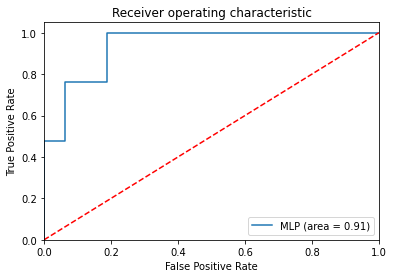

In [216]:
ml_roc_auc = roc_auc_score(y_test, mlp.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, mlp.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='MLP (area = %0.2f)' % ml_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

In [217]:
cur_predictions = mlp.predict(X_cur)

In [218]:
cur_teams["pred_itm"] = cur_predictions
cur_teams[['id', 'abbrev', 'wins', 'losses', 'pred_itm']].head(12)

/tmp/ipykernel_1340/1077995852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cur_teams["pred_itm"] = cur_predictions


,id,abbrev,wins,losses,pred_itm
0,1,Caw,8,6,0.0
1,2,TOTY,7,7,0.0
2,3,Sith,5,9,0.0
3,7,TMB,4,10,0.0
4,9,Mill,5,9,0.0
5,10,BD,9,5,1.0
6,12,Rock,7,7,0.0
7,13,2021,10,4,0.0
8,15,faq,7,7,0.0
9,16,JJJ,3,11,0.0


In [219]:
prob_predict = mlp.predict_proba(X_cur)
for i in range(len(X_cur)):
	print("X=%s, Predicted=%.2f" % (X_cur.values[i], prob_predict[i][1]))

X=[ 8.          6.          1.21017147 -0.90963767 -1.55977928 -0.70710678
  5.          0.26287797], Predicted=0.10
X=[7.         7.         0.28101484 0.87391039 0.2515773  1.41421356
 8.         0.60259719], Predicted=0.00
X=[ 5.          9.         -1.4008042  -0.6350832   2.06293388 -0.70710678
  9.         -0.61068574], Predicted=0.00
X=[ 4.         10.         -1.49986869  0.84117505  0.85536283 -0.70710678
 11.         -2.01809395], Predicted=0.00
X=[ 5.          9.         -1.30401705 -0.44606301 -0.35220822 -0.70710678
 10.         -0.46509179], Predicted=0.00
X=[ 9.          5.          1.00976514 -0.72272944 -0.95599375  0.35355339
  3.          1.184973  ], Predicted=0.82
X=[ 7.          7.         -0.19950488 -0.09864601 -0.35220822  0.35355339
  6.         -0.51362311], Predicted=0.00
X=[10.          4.          0.49963993 -1.77976414  0.2515773  -0.70710678
  2.          0.26287797], Predicted=0.11
X=[ 7.          7.         -0.3902325   0.07981439  0.85536283 -1.767766